In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

restaurants = pd.read_csv("restaurants.csv")

restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [6]:
cuisine_options_count = restaurants.cuisine.nunique()

cuisine_counts = restaurants.groupby("cuisine").id.count().reset_index()

cuisine_counts

,cuisine,id
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


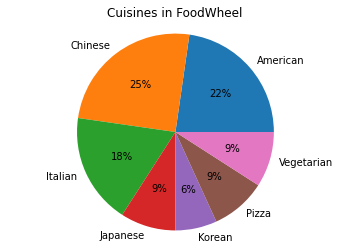

In [3]:
cuisines = ["American", "Chinese", "Italian", "Japanese", "Korean", "Pizza", "Vegetarian"]
counts = [10, 11, 8, 4, 3, 4, 4]

plt.pie(counts, labels = cuisines, autopct='%d%%')
plt.title("Cuisines in FoodWheel")
plt.axis("equal")
plt.show()

In [5]:
orders = pd.read_csv("orders.csv")
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


In [9]:
orders["month"] = orders.apply(lambda row: row["date"][0], axis = 1)
avg_order = orders.groupby("month").price.mean().reset_index()
avg_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


In [10]:
std_order = orders.groupby("month").price.std().reset_index()
print(std_order)

  month     price
0     4  2.562504
1     5  3.395210
2     6  2.835934
3     7  2.848985
4     8  4.455556
5     9  4.518806


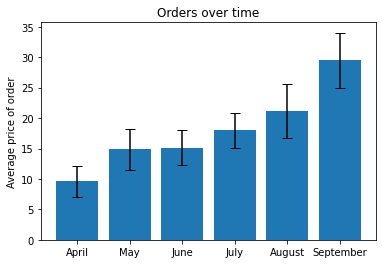

In [11]:
ax = plt.subplot()
bar_heights = avg_order["price"]
bar_errors = std_order["price"]
plt.bar(range(6), bar_heights, yerr = bar_errors, capsize=5)
ax.set_xticks(range(6))
ax.set_xticklabels(["April", "May", "June", "July", "August", "September"])
plt.ylabel("Average price of order")
plt.title("Orders over time")
plt.show()

   customer_id  price
0            0   83.0
1            2   11.0
2            3   65.0
3            4   32.0
4            5  119.0


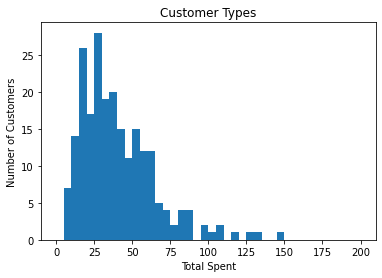

In [12]:
customer_amount = orders.groupby("customer_id").price.sum().reset_index()
print(customer_amount.head())
plt.hist(customer_amount["price"], range=(0,200),  bins=40)
plt.xlabel("Total Spent")
plt.ylabel("Number of Customers")
plt.title("Customer Types")
plt.show()